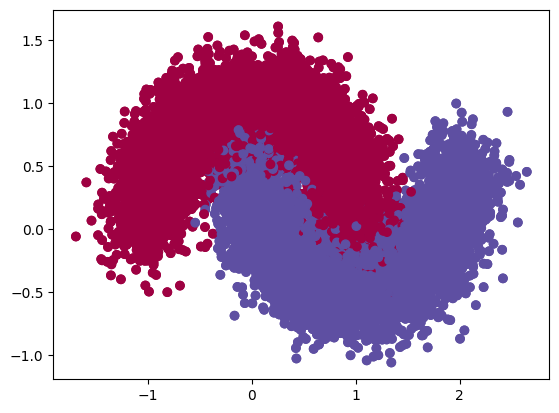

In [1]:
import numpy as np 
def initialise_parameters(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b 
def tanh(z):
    s=np.tanh(z)
    return s 
def propogate(w,b,x,y):
    m=x.shape[1]
    A=sigmoid(np.dot(w.T,x))+b 
    cost=-1/m*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    dw=1/m*np.dot(x,(A-y).T)
    db=1/m*np.sum((A-y))
    grads={'dw':dw,'db':db}
    return grads,cost 
def optimise(w,b,x,y,num_iterations,learning_rate,print_cost=True):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(w,b,x,y)
        dw=grads['dw']
        db=grads['db']
        w-=learning_rate*dw
        b-=learning_rate*db 
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("cost after iterations->%i:%f"%(i,cost))
    params={'w':w,'b':b}
    grads={'dw':dw,'db':db}
    return params,grads,cost 
def model(x_train,y_train,num_iterations=2000,learning_rate=0.5,print_cost=True):
    w,b=initialise_parameters(x_train.shape[0])
    parameters,_,cost=optimise(w,b,x_train,y_train,num_iterations,learning_rate,print_cost=True)
    w,b=parameters['w'],parameters['b']
    return {'cost':cost,'w':w,'b':b,'learning_rate':learning_rate,'num_iterations':num_iterations}
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 
(x_train,y_train)=make_moons(n_samples=10000,noise=0.2,random_state=42)
(x_test,y_test)=make_moons(n_samples=10000,noise=0.2,random_state=42)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.squeeze(),cmap=plt.cm.Spectral)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test.squeeze(),cmap=plt.cm.Spectral)
plt.show()
